BreitbartNews


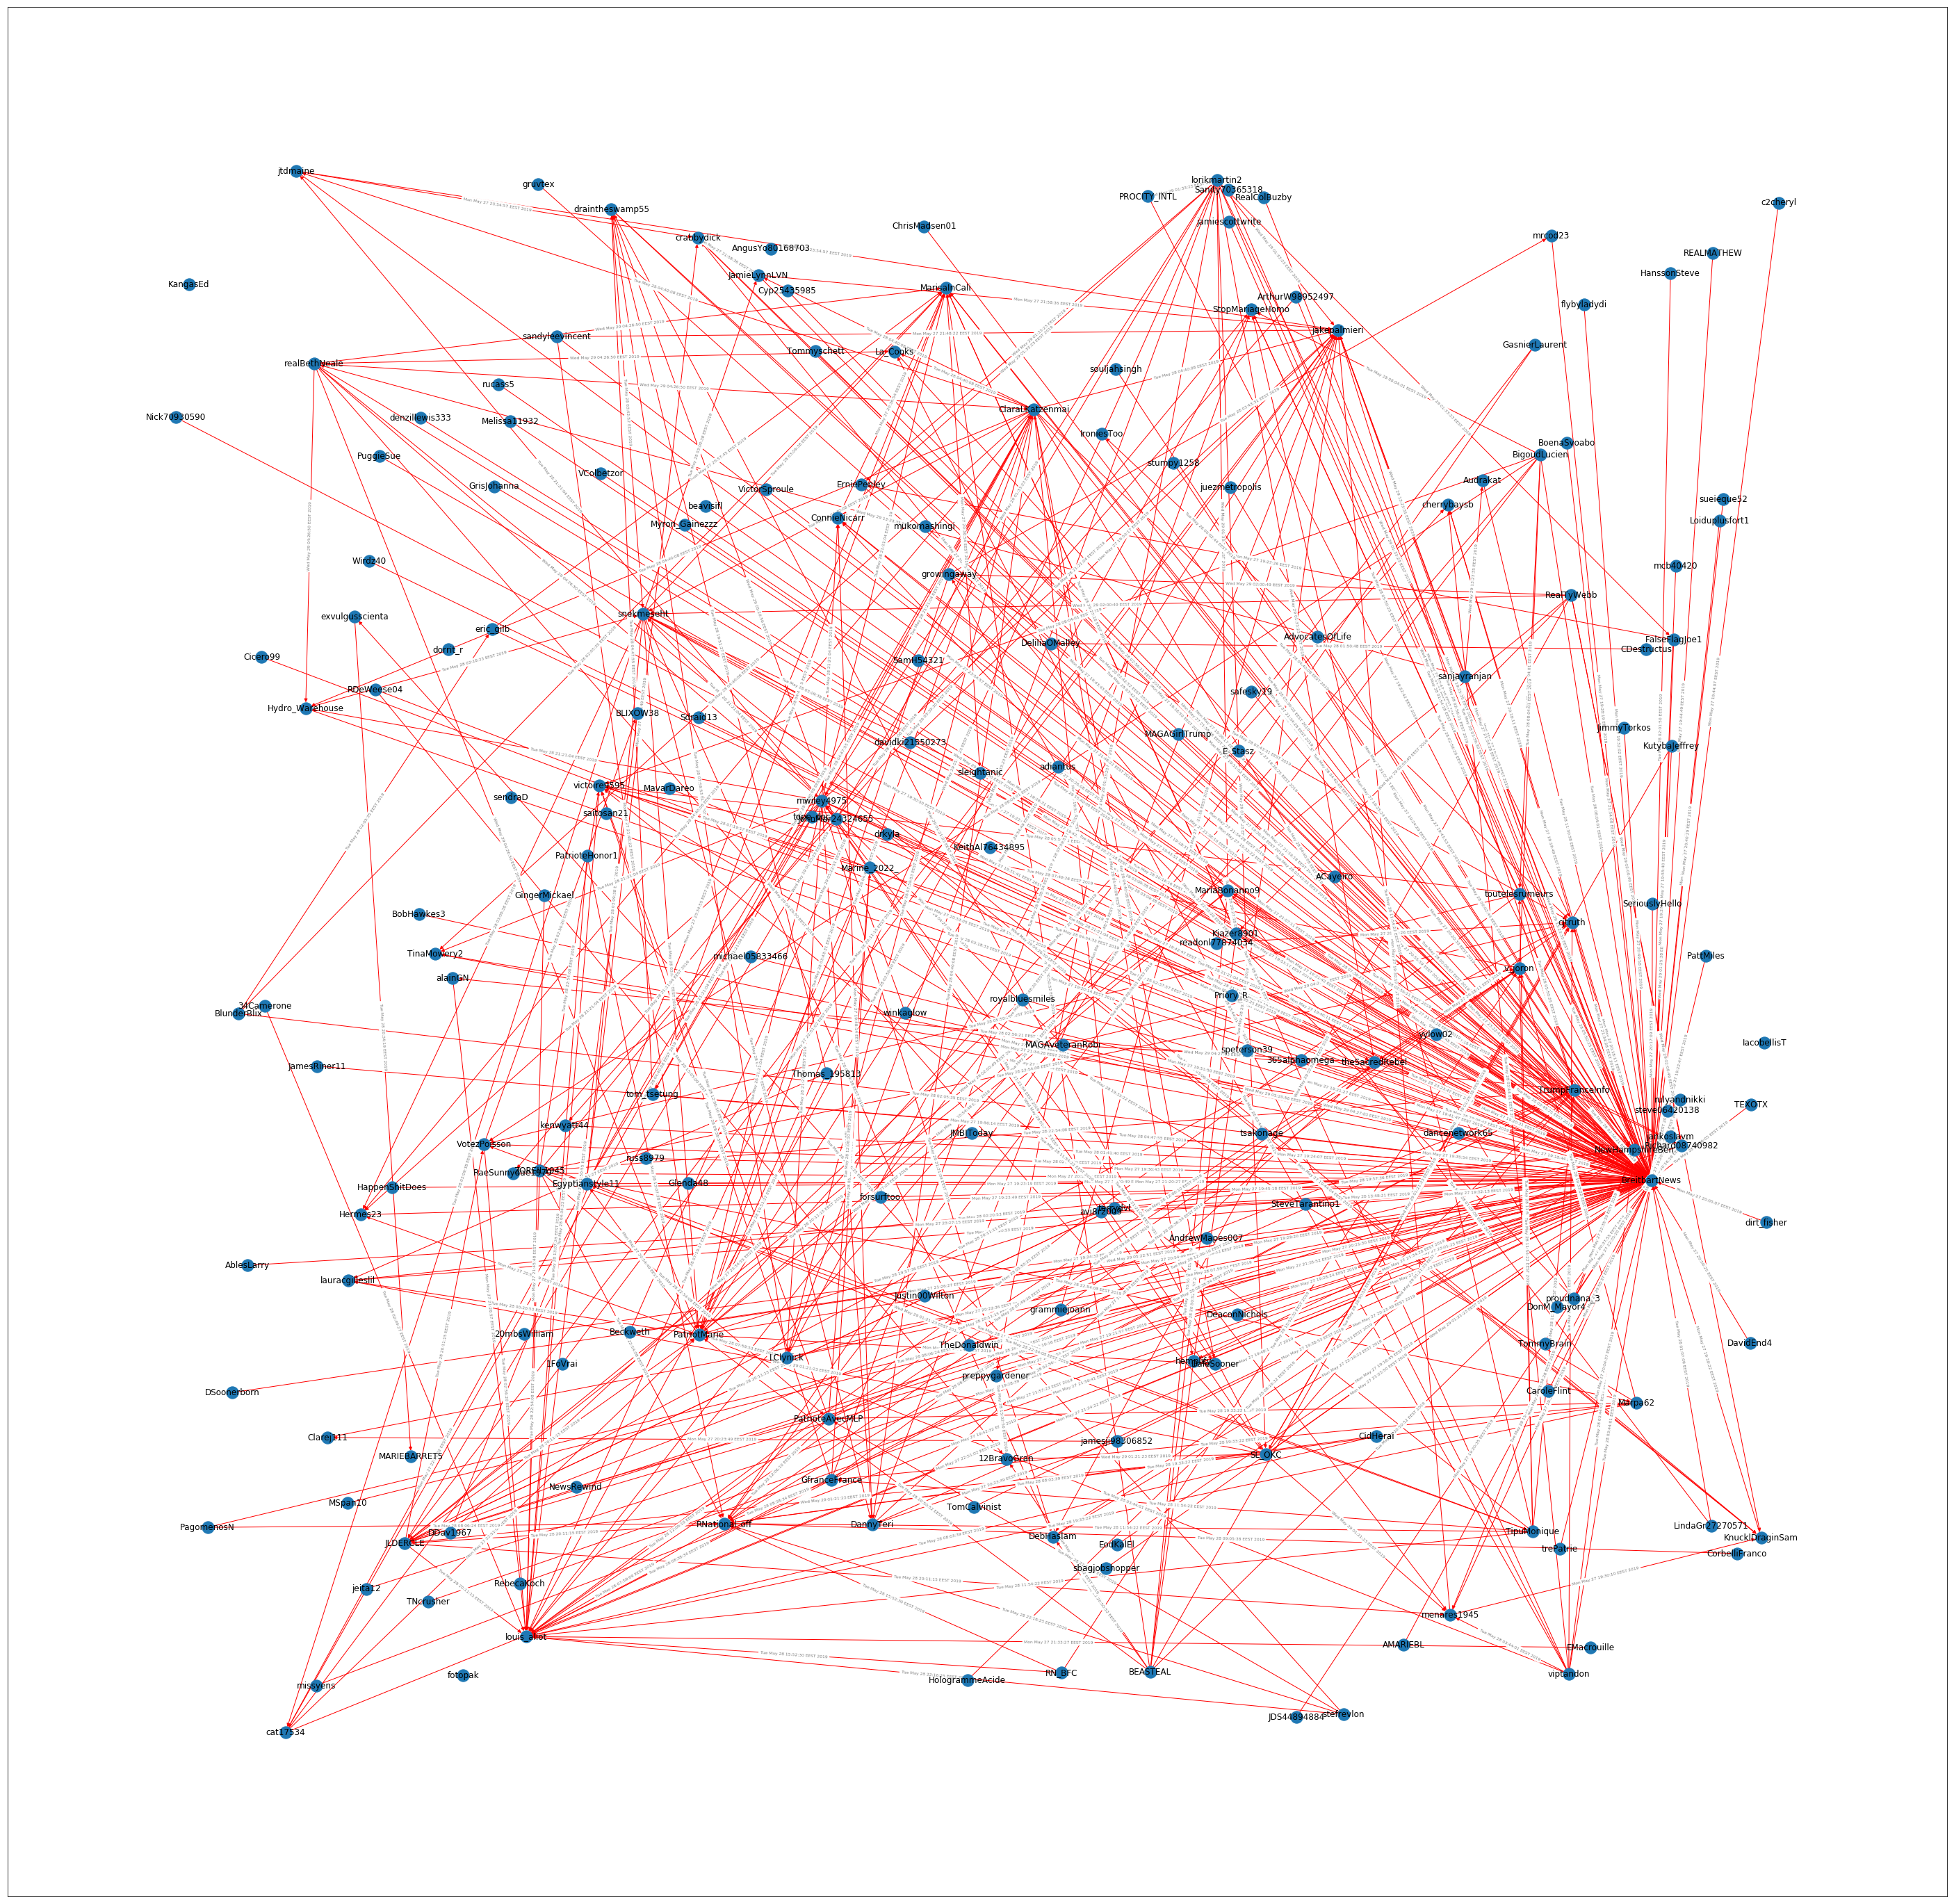

In [48]:
# Generates a Graph using the networkx library and plotting it with matplotlib
import networkx as nx
import json
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))

foldername = "june"
filename = "1133089990576095232"
filepath = f"data/relationships/{folder_name}/json/{1133089990576095232}.json"

users = {}
with open(filepath, 'r') as f:
    users = json.load(f)
    
G = nx.DiGraph()

origin = users[0]['screen_name']
print(origin)

for user in users:
    if not G.has_node(user['screen_name']):
        G.add_node(user['screen_name'])
    for follower in user['followers']:
        if not G.has_node(follower):
            G.add_node(follower)
        if not G.has_edge(follower, user['screen_name']):
            G.add_edge(follower, user['screen_name'])
        
pos = nx.random_layout(G)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)

edge_labels = dict([((u,v),user['tweet']) for u,v in G.edges 
                    for user in users if u == user['screen_name']])
nx.draw_networkx_edge_labels(G, pos, edge_labels, alpha=0.5, font_size=6)
            
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

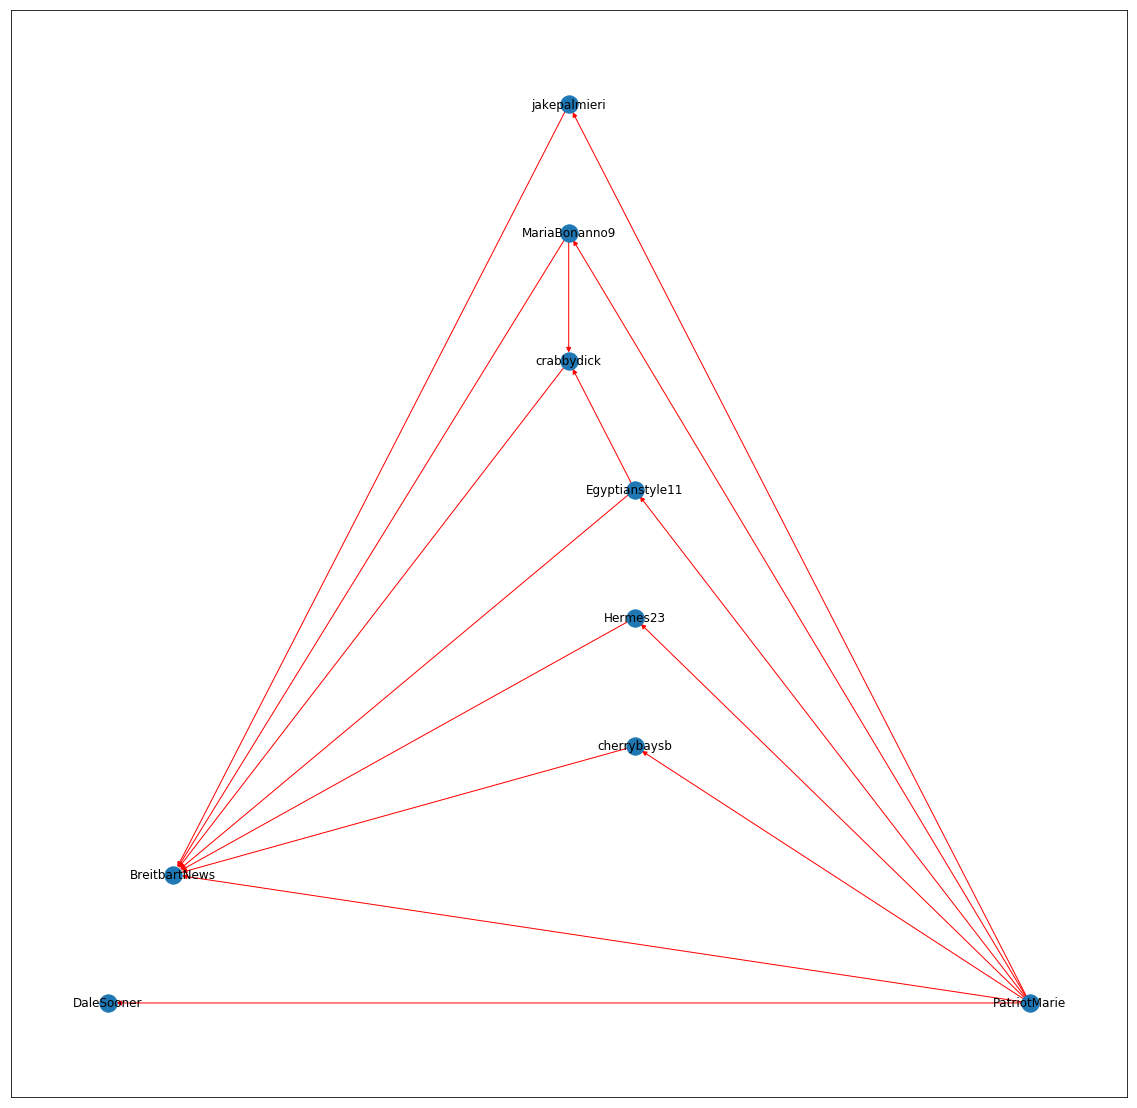

In [4]:
# Generating a subgraph, from a given node to the origin
plt.figure(figsize=(20, 20))

def subgraph_from_node(node):
    nodes = [node]
    
    queue = [neighbor for neighbor in G.neighbors(node)]
    while queue:
        next_one = queue.pop()
        if next_one not in nodes:
            nodes.append(next_one)
        queue.extend(neighbor for neighbor in G.neighbors(next_one))
    return nodes

# "PatriotMarie" is a manually picked node that has some interest
# for our subgraph creation
subgraph = G.subgraph(subgraph_from_node("PatriotMarie"))

pos2 = nx.planar_layout(subgraph)
nx.draw_networkx_labels(subgraph, pos2)
nx.draw_networkx_nodes(subgraph, pos2, node_size = 300)
nx.draw_networkx_edges(subgraph, pos2, edge_color='r', arrows=True)

plt.show

In [41]:
# Creates a copy of the given graph, while reversing the edges' direction
# in order to compute the simrank similarity from the source-origin node

G2 = G.reverse()

In [49]:
# SimRank similarity of the subgraph nodes using
# the networkx algorithm
import json

to_json_similarity = json.dumps((nx.simrank_similarity(G2, source=origin)), indent=4)

print(to_json_similarity)

{
    "BreitbartNews": 1,
    "tom_tsetung": 0.016936619794607567,
    "sendraD": 0.0,
    "La_Cooks": 0.009722899008837155,
    "Cyp25435985": 0.0,
    "RaeSunnydae1979": 0.016936619794607567,
    "StopMariageHomo": 0.0044231478260869555,
    "Sanity70365318": 0.0,
    "MAGAveteranRobi": 0.0,
    "SamH54321": 0.0,
    "Priory_R": 0.0,
    "PuggieSue": 0.0,
    "crabbydick": 0.022779174254308605,
    "viptandon": 0.0,
    "DDav1967": 0.0,
    "tope_doc": 0.0,
    "AMARIEBL": 0.0,
    "BobHawkes3": 0.0,
    "dirt_fisher": 0.0,
    "Hydro_Warehouse": 0.013505084903105929,
    "mukomashingi": 0.0,
    "dancenetwork65": 0.0,
    "winkaglow": 0.0,
    "CaroleFlint": 0.0,
    "KnucklDraginSam": 0.01193571047033938,
    "flybyladydi": 0.0,
    "Sdraid13": 0.0,
    "Cicero99": 0.0,
    "gruvtex": 0.0,
    "ACayeiro": 0.0,
    "TNcrusher": 0.0,
    "adiantus": 0.0,
    "BEASTEAL": 0.0,
    "KutybaJeffrey": 0.0,
    "MariaBonanno9": 0.00974238251121926,
    "terrydvl": 0.011877884675735313,
    

In [50]:
# Calculates the new size of each node in the graph
# based on the vectors produced by the simrank algorithm
nodes_size = [node * 3000 if node != 0.0 else 10.0 for node in json.loads(to_json_similarity).values()]
for node in nodes_size:
    print(node)

3000
50.809859383822705
10.0
29.168697026511467
10.0
50.809859383822705
13.269443478260866
10.0
10.0
10.0
10.0
10.0
68.33752276292581
10.0
10.0
10.0
10.0
10.0
10.0
40.51525470931779
10.0
10.0
10.0
10.0
35.80713141101814
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
29.22714753365778
35.63365402720594
10.0
35.92010102673016
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
16.770186335403725
17.68302219791078
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
50.66516873925415
38.11831511626078
10.0
41.22935167031981
55.75933730680494
33.649950592885375
10.0
20.964793941584094
40.94579494825539
10.0
10.0
16.770186335403725
16.770186335403725
10.0
8.680953557312254
41.73814303594803
10.0
10.0
8.385093167701863
51.775764756518385
55.72153820355737
10.0
10.0
48.31987229249879
10.0
11.034782608695652
10.0
44.42195038695805
10.0
10.0
42.22759579943369
51.25632643644522
10.0
10.0
10.0
10.0
38.64709639360239
50.66516873925415
16.770186335403725
16.679758716434982
10.0
10.0
27.95983907396951
10.0

<function matplotlib.pyplot.show(*args, **kw)>

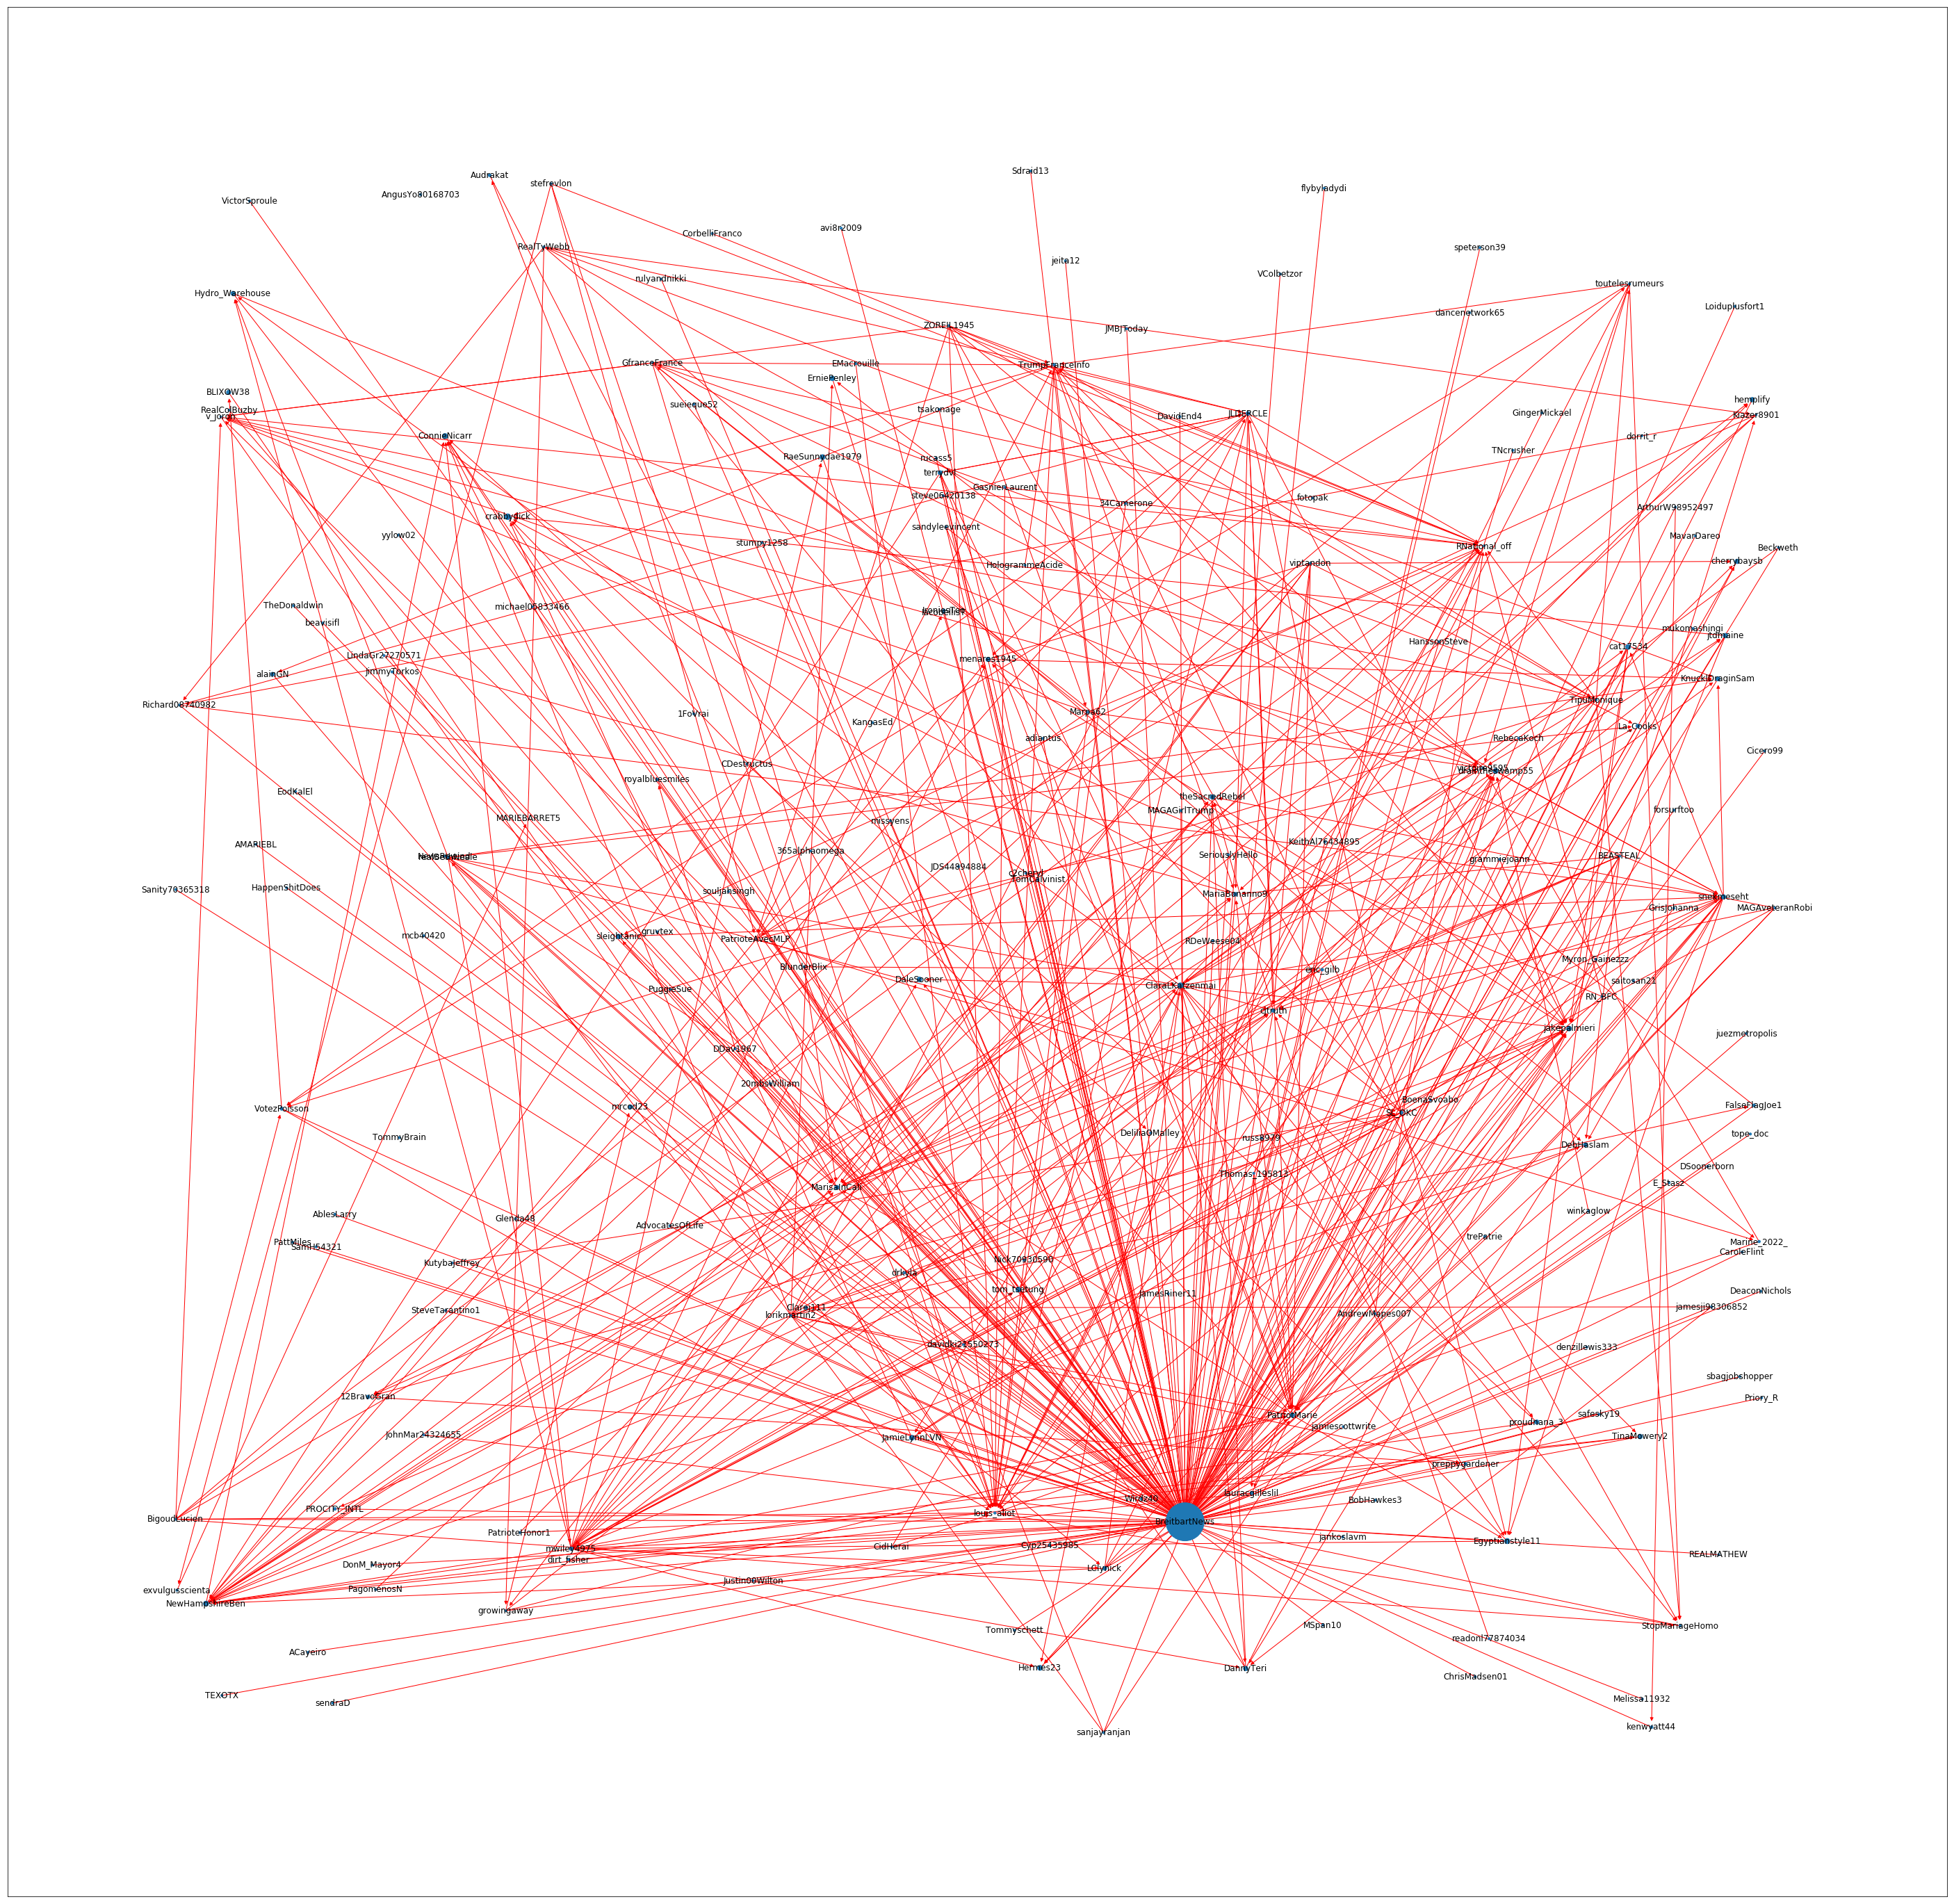

In [46]:
# Plotting the graph with the new node sizes
plt.figure(figsize=(50, 50))

pos3 = nx.random_layout(G)
nx.draw_networkx_labels(G, pos3)
nx.draw_networkx_nodes(G, pos3, node_size = nodes_size)
nx.draw_networkx_edges(G, pos3, edge_color='r', arrows=True)

plt.show